<a href="https://colab.research.google.com/github/FANG87003/2025_ML_hws/blob/main/hw4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 113-2 深度學習 作業 4-1

## 載入套件

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from ipywidgets import interact_manual

## 顯示中文

In [ ]:
# 下載思源黑體字型（支援中文）
!wget -qO /usr/share/fonts/truetype/NotoSansCJKtc-Regular.otf https://github.com/googlefonts/noto-cjk/raw/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Regular.otf

# 重新載入字型
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/NotoSansCJKtc-Regular.otf')
plt.rcParams['font.family'] = 'Noto Sans CJK TC'

## 一、資料預處理

In [ ]:
# 下載 CIFAR-10 數據集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
# 顯示資料形狀
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


### 資料常模化 (normalization)

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

### One-hot encoding

In [ ]:
y_train_oh = to_categorical(y_train, 10)
y_test_oh = to_categorical(y_test, 10)

### 顯示三張訓練圖片與真實標籤

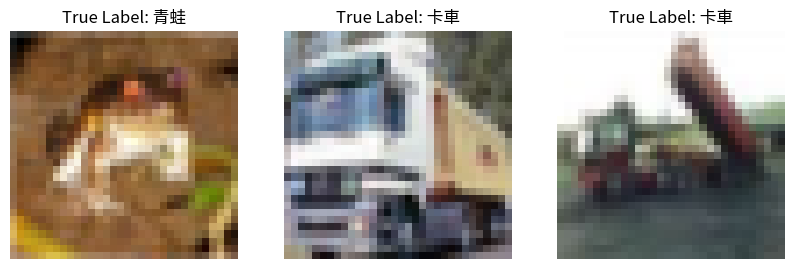

In [ ]:
class_name = ['飛機', '汽車', '鳥', '貓', '鹿', '狗', '青蛙', '馬', '船', '卡車']

plt.figure(figsize=(10,4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(f"True Label: {class_name[y_train[i].item()]}")
    plt.axis('off')
plt.show()

## 二、建立神經網路模型

In [ ]:
model = Sequential()

### 第一層：卷積層 (16 個 Filter，大小為 3x3)
* 圖片尺寸為	32x32
* 彩色圖片	3 通道（RGB）
* (32, 32, 16)
* 卷積層參數 = (Filter高 × Filter寬 × 前層輸入通道數 + 偏值) × 本層通道數





In [ ]:
model.add(Conv2D(16, (3,3), padding='same',
        input_shape=(32,32,3),
        activation='relu'))  # (3x3x3+1)x16 = 448

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 第二層：卷積層 (16 個 Filter，大小為 3x3)
* 圖片尺寸為	32x32
* (32, 32, 16)
* 前一層輸出 16 個通道
* 本層 16 通道

In [ ]:
model.add(Conv2D(16, (3,3), padding='same',
        activation='relu',))  # (3x3x16+1)x16 = 2320

### 第三層：池化層
* 圖片尺寸為	16x16
* (16, 16, 16)
* 保留前一層 16 個通道

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

### 第四層：卷積層 (32 個 Filter，大小為 3x3)
* 圖片尺寸為 16x16
* (16, 16, 32)
* 前一層輸出 16 個通道
* 本層 32 通道


In [ ]:
model.add(Conv2D(32, (3,3), padding='same',
        activation='relu'))  # (3x3x16+1)x32 = 4640

### 第五層：卷積層 (32 個 Filter，大小為 3x3)
* 圖片尺寸為 16x16
* (16, 16, 32)
* 前一層輸出 32 個通道
* 本層 32 通道

In [ ]:
model.add(Conv2D(32, (3,3), padding='same',
        activation='relu'))  # (3x3x32+1)x32 = 9248

### 第六層：池化層
* 圖片尺寸為	8x8
* (8, 8, 32)
* 保留前一層 32 個通道

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

### 第七層：拉平層
* (8, 8, 32) → 2048

In [ ]:
model.add(Flatten())

### 第八層：全連接層 (10 個神經元)
* 10 個神經元對應 CIFAR-10 的 10 類別
* 每個神經元連接前一層的 2048 個輸入，共有 20480 個權重 + 10 個偏值 = 20490 個參數。

In [ ]:
model.add(Dense(10, activation='softmax')) # 2048x10+10 = 20490

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,146 (145.10 KB)

 Trainable params: 37,146 (145.10 KB)

 Non-trainable params: 0 (0.00 B)

## 三、訓練神經網路模型

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [ ]:
train_history = model.fit(
    x_train, y_train_oh,
    validation_split=0.2,
    batch_size=128,
    epochs=20,
    verbose=2)

Epoch 1/20
313/313 - 79s - 252ms/step - accuracy: 0.4008 - loss: 1.6821 - val_accuracy: 0.4919 - val_loss: 1.4441
Epoch 2/20
313/313 - 81s - 259ms/step - accuracy: 0.5326 - loss: 1.3226 - val_accuracy: 0.5552 - val_loss: 1.2529
Epoch 3/20
313/313 - 80s - 255ms/step - accuracy: 0.5876 - loss: 1.1662 - val_accuracy: 0.6108 - val_loss: 1.1228
Epoch 4/20
313/313 - 84s - 268ms/step - accuracy: 0.6284 - loss: 1.0563 - val_accuracy: 0.6061 - val_loss: 1.1085
Epoch 5/20
313/313 - 81s - 259ms/step - accuracy: 0.6589 - loss: 0.9741 - val_accuracy: 0.6492 - val_loss: 1.0071
Epoch 6/20
313/313 - 85s - 273ms/step - accuracy: 0.6767 - loss: 0.9247 - val_accuracy: 0.6698 - val_loss: 0.9517
Epoch 7/20
313/313 - 77s - 246ms/step - accuracy: 0.6969 - loss: 0.8715 - val_accuracy: 0.6807 - val_loss: 0.9198
Epoch 8/20
313/313 - 87s - 278ms/step - accuracy: 0.7137 - loss: 0.8216 - val_accuracy: 0.6714 - val_loss: 0.9403
Epoch 9/20
313/313 - 77s - 246ms/step - accuracy: 0.7261 - loss: 0.7881 - val_accuracy: 

## 四、顯示 loss & accuracy 折線圖

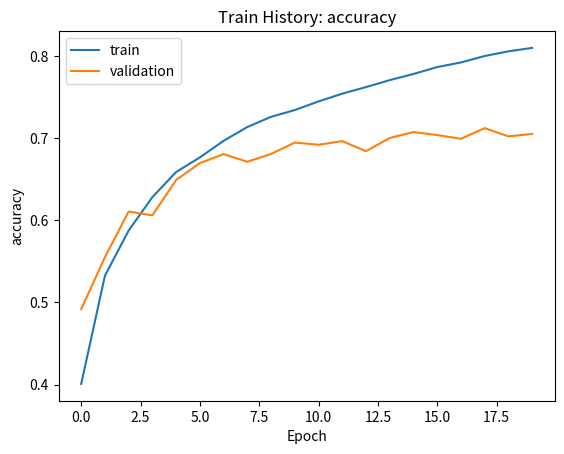

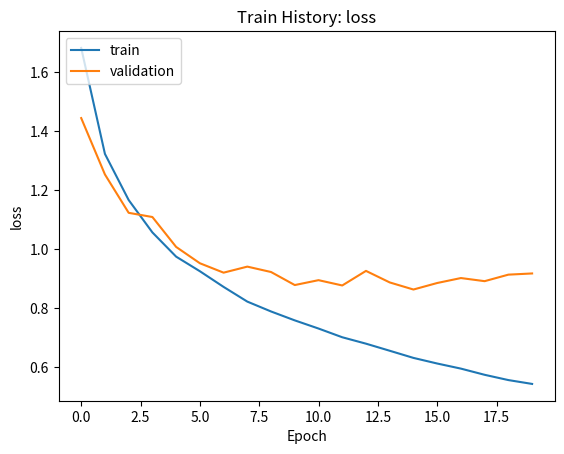

In [ ]:
def show_train_history(train_history, train, validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title(f'Train History: {train}')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

## 五、評估模型準確率

In [ ]:
scores = model.evaluate(x_test, y_test_oh)
print(f"accuracy: {scores[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7046 - loss: 0.9375
accuracy: 70.16%


## 六、預測

In [ ]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


In [ ]:
predictions.shape

(10000, 10)

In [ ]:
predictions

array([[2.06459750e-04, 2.36117794e-05, 2.32721868e-04, ...,
        1.48708014e-05, 1.47134036e-01, 1.50098553e-04],
       [4.55534500e-05, 6.71391375e-04, 3.52667833e-08, ...,
        5.41868703e-11, 9.99280930e-01, 2.05841616e-06],
       [7.38611724e-03, 3.45245004e-02, 4.74740402e-04, ...,
        8.40212801e-04, 9.51316297e-01, 7.58350536e-04],
       ...,
       [8.87495698e-05, 3.89430033e-06, 1.70164928e-01, ...,
        2.34067235e-02, 2.64135958e-03, 2.03784104e-04],
       [6.55518249e-02, 1.46857053e-02, 2.00839699e-04, ...,
        1.86297926e-03, 3.11822805e-04, 3.68473811e-05],
       [1.36440008e-06, 1.67546714e-05, 2.64122700e-05, ...,
        9.78243947e-01, 1.28117135e-05, 1.19864592e-06]], dtype=float32)

In [ ]:
predicted_classes = np.argmax(predictions, axis=1)

## 七、顯示圖片與標籤名稱

In [ ]:
import matplotlib.pyplot as plt

def plot_images_labels_prediction(images, true_labels, pred_labels, label_names, idx, num):
  plt.figure(figsize=(6, 7))
  if num > 25: num = 25
  for i in range(num):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[idx + i])

    true_idx = np.squeeze(true_labels[idx + i])
    pred_idx = np.squeeze(pred_labels[idx + i])

    true_name = label_names[true_idx]
    pred_name = label_names[pred_idx]

    plt.title(f'True: {true_name}\nPred: {pred_name}', fontsize=10)
    plt.axis('off')

  plt.tight_layout()
  plt.show()

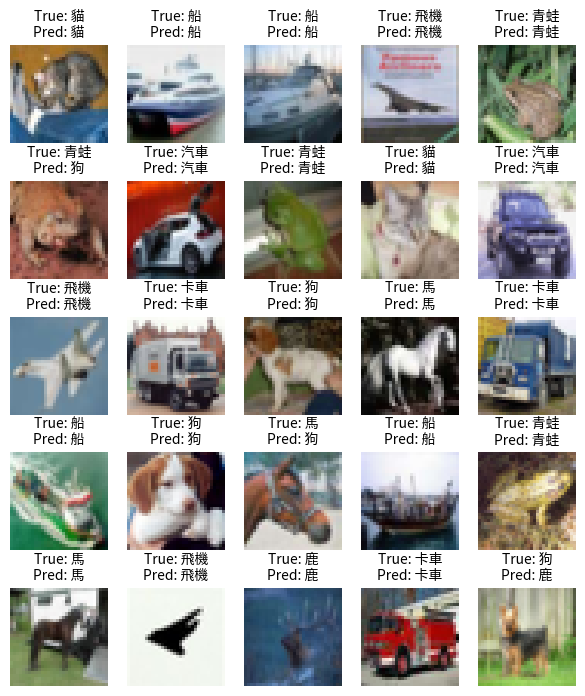

In [ ]:
plot_images_labels_prediction(x_test, y_test, predicted_classes, class_name, idx=0, num=25)

## 八、混淆矩陣 (Confusion Matrix)

In [ ]:
import pandas as pd

pd.crosstab(np.squeeze(y_test), predicted_classes, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,737,11,41,21,7,12,9,8,119,35
1,21,772,11,4,4,9,10,4,47,118
2,79,4,543,53,95,94,76,28,21,7
3,25,9,65,466,65,244,59,28,26,13
4,22,4,73,68,657,67,49,43,14,3
5,15,0,44,139,44,680,18,40,8,12
6,6,5,42,66,36,35,787,8,10,5
7,26,1,44,42,70,83,8,705,9,12
8,47,19,13,11,6,8,4,3,872,17


## 九、儲存完整模型

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [ ]:
model.save('cnn_cifar10_model.keras')

## 十、interact_manual

神經網路判斷為： 狗
正確答案為： 貓


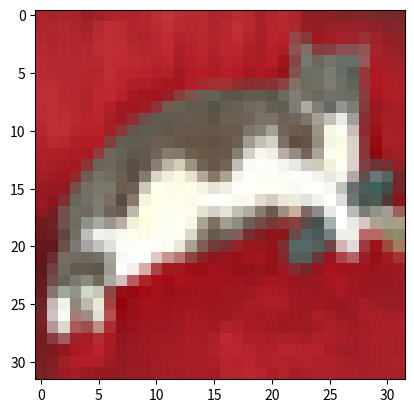

In [ ]:
def test(測試編號):
  plt.imshow(x_test[測試編號], cmap='Greys')
  print('神經網路判斷為：', class_name[predicted_classes[測試編號]])
  print('正確答案為：', class_name[np.squeeze(y_test[測試編號])])

#interact_manual(test, 測試編號=(0, len(x_test)-1))
test(7015)